# 4 Test Results

In [1]:
import numpy as np
import itertools
from keras.applications import inception_v3
from keras.models import load_model
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
# Load the test data
X_test, y_test = np.load('./data/X_test.npy'), np.load('./data/y_test.npy')
print 'X_test.shape:', X_test.shape
print 'y_test.shape:', y_test.shape

X_test.shape: (1000, 299, 299, 3)
y_test.shape: (1000,)


In [4]:
# Load the model
model = load_model('./models/model_foodvsnot_v2.h5')

In [5]:
# Predict test data
p_test = model.predict(inception_v3.preprocess_input(X_test.astype(np.float32)), verbose=1)

1000/1000 [==============================] - 6s     


## Prediction Score Distribution

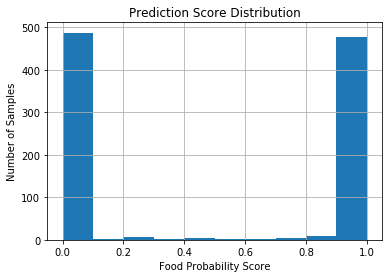

In [6]:
pd.Series(p_test[:, 1]).hist()
plt.xlabel('Food Probability Score'); plt.ylabel('Number of Samples')
_ = plt.title('Prediction Score Distribution')

## Accuracy

In [7]:
# Accuracy
threshold = 0.5
accuracy = np.mean(y_test == (p_test[:, 1] > threshold).astype(np.int))
print 'Accuracy with', threshold, 'threshold:', accuracy

Accuracy with 0.5 threshold: 0.986


## Confusion Matrix

Threshold: 0.5
Confusion matrix, without normalization
[[495   5]
 [  9 491]]


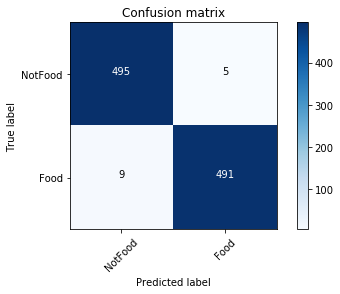

In [8]:
# Confusion Matrix
threshold = 0.5
print 'Threshold:', threshold
cm = metrics.confusion_matrix(y_test, (p_test[:, 1] > threshold).astype(np.int))
plot_confusion_matrix(cm, ['NotFood', 'Food'])

## ROC Curve

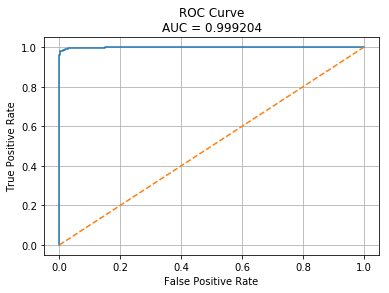

In [9]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, p_test[:, 1])
auc = metrics.roc_auc_score(y_test, p_test[:, 1])
# Plot
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--'); plt.grid('on')
plt.xlabel('False Positive Rate'); 
plt.ylabel('True Positive Rate');
plt.title('ROC Curve\nAUC = ' + str(auc))

## F1 Score

In [10]:
# F1 Score
threshold = 0.5
y_pred = (p_test[:, 1] > threshold).astype(np.int)
f1_score = metrics.f1_score(y_test, y_pred)
print 'F1 Score:', f1_score

F1 Score: 0.9859437751


## Log Loss

In [11]:
# Log loss
log_loss = metrics.log_loss(y_test, p_test[:, 1])
print 'log_loss:', log_loss

log_loss: nan


/home/can/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1662: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
/home/can/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1662: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)


## Misclassified Images

Number of Misclassified Images: 14


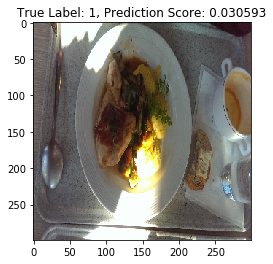

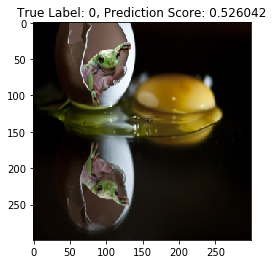

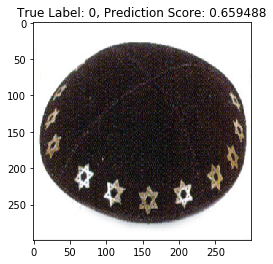

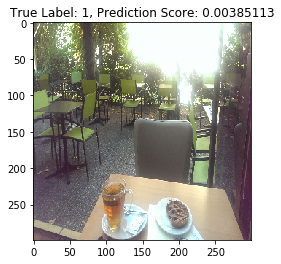

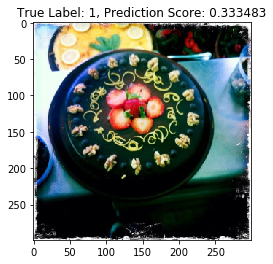

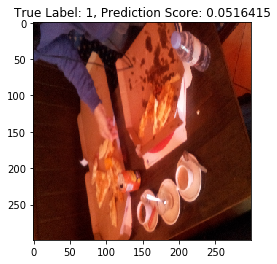

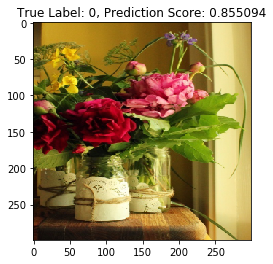

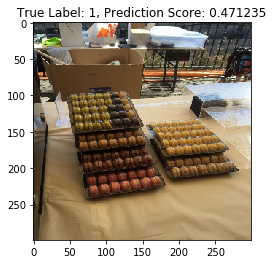

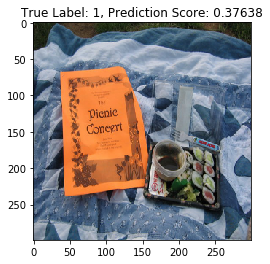

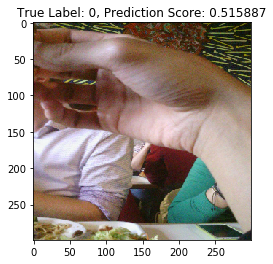

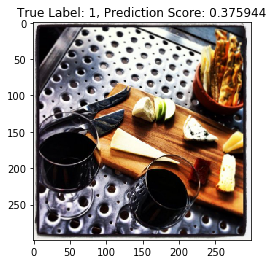

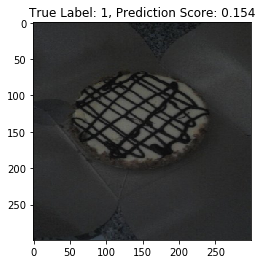

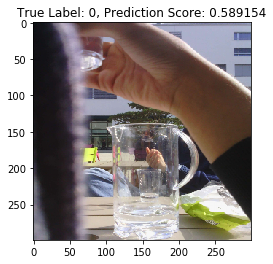

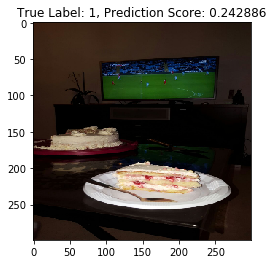

In [12]:
threshold = 0.5
predictions = (p_test[:, 1] > threshold).astype(np.int)
print 'Number of Misclassified Images:', len(np.where(y_test != predictions)[0])
for i in np.where(y_test != predictions)[0]:
    fig = plt.figure()
    plt.imshow(X_test[i])
    plt.title('True Label: ' + str(y_test[i]) + ', Prediction Score: ' + str(p_test[i, 1]))

## Images that the Model is Unsure

Number of Images that the model is unsure 5


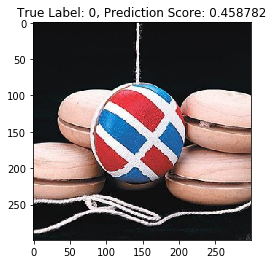

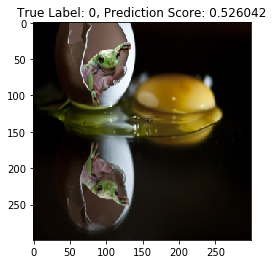

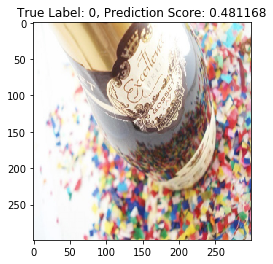

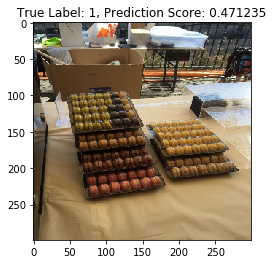

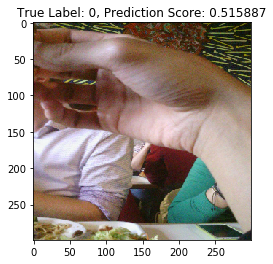

In [13]:
# Display images that the model is unsure
limit = 0.1
i_unsure = np.where(np.abs(p_test[:, 0] - p_test[:, 1]) < limit)[0]
print 'Number of Images that the model is unsure', len(i_unsure)
for i in i_unsure:
    fig = plt.figure()
    plt.imshow(X_test[i])
    plt.title('True Label: ' + str(y_test[i]) + ', Prediction Score: ' + str(p_test[i, 1]))